In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
!pip install scikit-learn
import seaborn as sns
import os
!pip install chart_studio


# Plotly to create interactive graph
import chart_studio.plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=False)
import plotly.figure_factory as ff
import plotly.graph_objs as go

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# To remove un-necessary warnings
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'frame'

In [249]:
ipl2020=pd.read_csv(r'IPL Ball-by-Ball 2008-2020.csv')
ipl2021=pd.read_csv(r'IPL Ball-by-Ball Dataset 2021.csv')

In [250]:
ipl2020.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [251]:
ipl2021.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,1254058,1,0,1,RG Sharma,CA Lynn,Mohammed Siraj,2,0,2,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
1,1254058,1,0,2,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
2,1254058,1,0,3,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
3,1254058,1,0,4,RG Sharma,CA Lynn,Mohammed Siraj,2,0,2,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore
4,1254058,1,0,5,RG Sharma,CA Lynn,Mohammed Siraj,0,0,0,0,0,NaN,NaN,NaN,NaN,Mumbai Indians,Royal Challengers Bangalore


In [252]:
matchdata = pd.concat(
    map(pd.read_csv, [r'IPL Ball-by-Ball 2008-2020.csv', r'IPL Ball-by-Ball Dataset 2021.csv']), ignore_index=True)

In [253]:
matchdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198569 entries, 0 to 198568
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                198569 non-null  int64 
 1   inning            198569 non-null  int64 
 2   over              198569 non-null  int64 
 3   ball              198569 non-null  int64 
 4   batsman           198569 non-null  object
 5   non_striker       198569 non-null  object
 6   bowler            198569 non-null  object
 7   batsman_runs      198569 non-null  int64 
 8   extra_runs        198569 non-null  int64 
 9   total_runs        198569 non-null  int64 
 10  non_boundary      198569 non-null  int64 
 11  is_wicket         198569 non-null  int64 
 12  dismissal_kind    9764 non-null    object
 13  player_dismissed  9764 non-null    object
 14  fielder           6968 non-null    object
 15  extras_type       10500 non-null   object
 16  batting_team      198569 non-null  obj

In [254]:
# Aligning the team names for match data (ball by ball data)

matchdata['batting_team'] = matchdata['batting_team'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')
matchdata['bowling_team'] = matchdata['bowling_team'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')

matchdata['batting_team'] = matchdata['batting_team'].replace(['Rising Pune Supergiant'],'Pune Warriors')
matchdata['bowling_team'] = matchdata['bowling_team'].replace(['Rising Pune Supergiant'],'Pune Warriors')

matchdata['batting_team'] = matchdata['batting_team'].replace(['Rising Pune Supergiants'],'Pune Warriors')
matchdata['bowling_team'] = matchdata['bowling_team'].replace(['Rising Pune Supergiants'],'Pune Warriors')

matchdata['batting_team'] = matchdata['batting_team'].replace(['Delhi Daredevils'],'Delhi Capitals')
matchdata['bowling_team'] = matchdata['bowling_team'].replace(['Delhi Daredevils'],'Delhi Capitals')

matchdata['batting_team'] = matchdata['batting_team'].replace(['Punjab Kings'],'Kings XI Punjab')
matchdata['bowling_team'] = matchdata['bowling_team'].replace(['Punjab Kings'],'Kings XI Punjab')


In [255]:
season_data2020 = pd.read_csv(r'IPL Matches 2008-2020.csv')
season_data2021 = pd.read_csv(r'IPL Matches Dataset 2021.csv')

In [256]:
seasondata = pd.concat(
    map(pd.read_csv, [r'IPL Matches 2008-2020.csv', r'IPL Matches Dataset 2021.csv']), ignore_index=True)

In [257]:
# Aligning the team names for season data (matches data)

seasondata['team1'] = seasondata['team1'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')
seasondata['team2'] = seasondata['team2'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')
seasondata['toss_winner'] = seasondata['toss_winner'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')
seasondata['winner'] = seasondata['winner'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')

seasondata['team1'] = seasondata['team1'].replace(['Rising Pune Supergiants'],'Pune Warriors')
seasondata['team2'] = seasondata['team2'].replace(['Rising Pune Supergiants'],'Pune Warriors')
seasondata['toss_winner'] = seasondata['toss_winner'].replace(['Rising Pune Supergiants'],'Pune Warriors')
seasondata['winner'] = seasondata['winner'].replace(['Rising Pune Supergiants'],'Pune Warriors')

seasondata['team1'] = seasondata['team1'].replace(['Rising Pune Supergiant'],'Pune Warriors')
seasondata['team2'] = seasondata['team2'].replace(['Rising Pune Supergiant'],'Pune Warriors')
seasondata['toss_winner'] = seasondata['toss_winner'].replace(['Rising Pune Supergiant'],'Pune Warriors')
seasondata['winner'] = seasondata['winner'].replace(['Rising Pune Supergiant'],'Pune Warriors')

seasondata['team1'] = seasondata['team1'].replace(['Delhi Daredevils'],'Delhi Capitals')
seasondata['team2'] = seasondata['team2'].replace(['Delhi Daredevils'],'Delhi Capitals')
seasondata['toss_winner'] = seasondata['toss_winner'].replace(['Delhi Daredevils'],'Delhi Capitals')
seasondata['winner'] = seasondata['winner'].replace(['Delhi Daredevils'],'Delhi Capitals')

seasondata['team1'] = seasondata['team1'].replace(['Punjab Kings'],'Kings XI Punjab')
seasondata['team2'] = seasondata['team2'].replace(['Punjab Kings'],'Kings XI Punjab')
seasondata['toss_winner'] = seasondata['toss_winner'].replace(['Punjab Kings'],'Kings XI Punjab')
seasondata['winner'] = seasondata['winner'].replace(['Punjab Kings'],'Kings XI Punjab')

In [258]:
seasondata['winner'].value_counts()

Mumbai Indians                 122
Chennai Super Kings            110
Kolkata Knight Riders          101
Sunrisers Hyderabad             96
Royal Challengers Bangalore     95
Kings XI Punjab                 90
Delhi Capitals                  90
Rajasthan Royals                83
Pune Warriors                   27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

#  Season Data

In [259]:
seasondata["season"] = pd.to_datetime(seasondata["date"]).dt.year

In [261]:
seasondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               837 non-null    int64  
 1   city             824 non-null    object 
 2   date             837 non-null    object 
 3   player_of_match  833 non-null    object 
 4   venue            837 non-null    object 
 5   neutral_venue    837 non-null    int64  
 6   team1            837 non-null    object 
 7   team2            837 non-null    object 
 8   toss_winner      837 non-null    object 
 9   toss_decision    837 non-null    object 
 10  winner           833 non-null    object 
 11  result           833 non-null    object 
 12  result_margin    819 non-null    float64
 13  eliminator       833 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          837 non-null    object 
 16  umpire2          837 non-null    object 
 17  season          

## Number of Matches Played in each City 

- Mumbai has hosted most no. of matches by far(111).
- As expected, top 9 cities are home grounds for the teams.

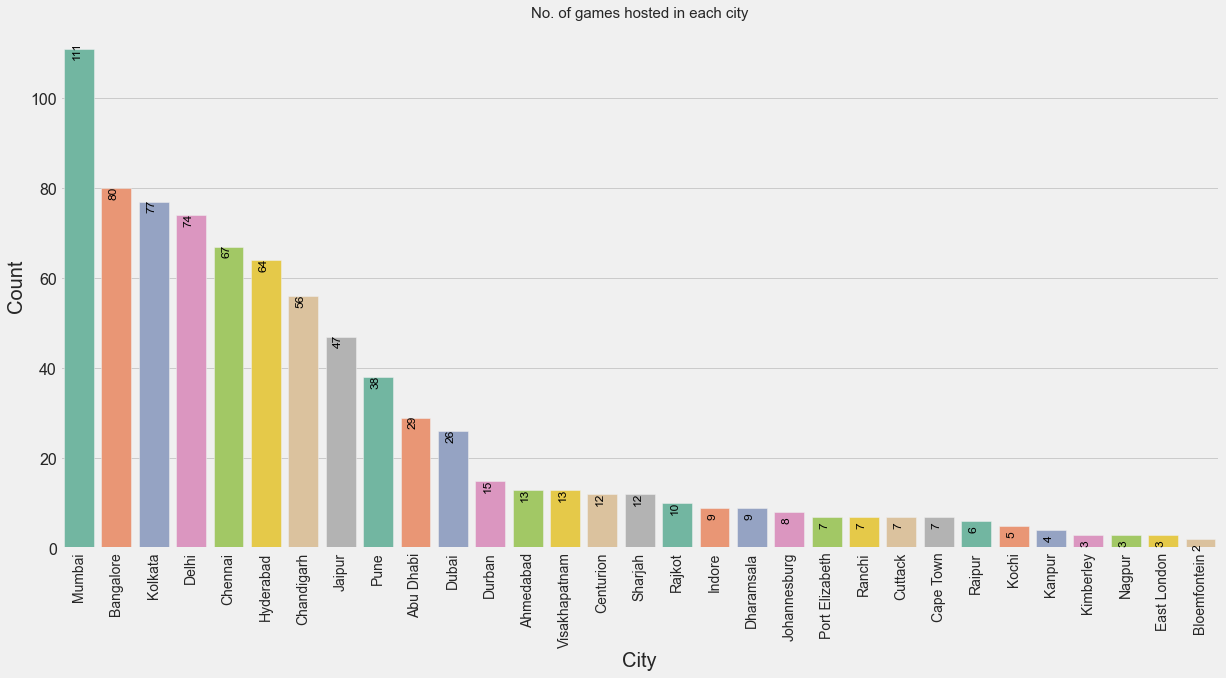

In [262]:
# Number of matches played at each City

seasondata.at[seasondata['city']=='Bengaluru','city']='Bangalore'

fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(seasondata['city'],order=seasondata['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(seasondata['city'].value_counts())
cities['name']=seasondata['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

## Number of Matches Played at each Venue

- Eden Gardens(Kolkata) has hosted most no. of IPL matches(77)
- Followed by Feroz Shah Kotla and Wankhede at no. 2  and 3.

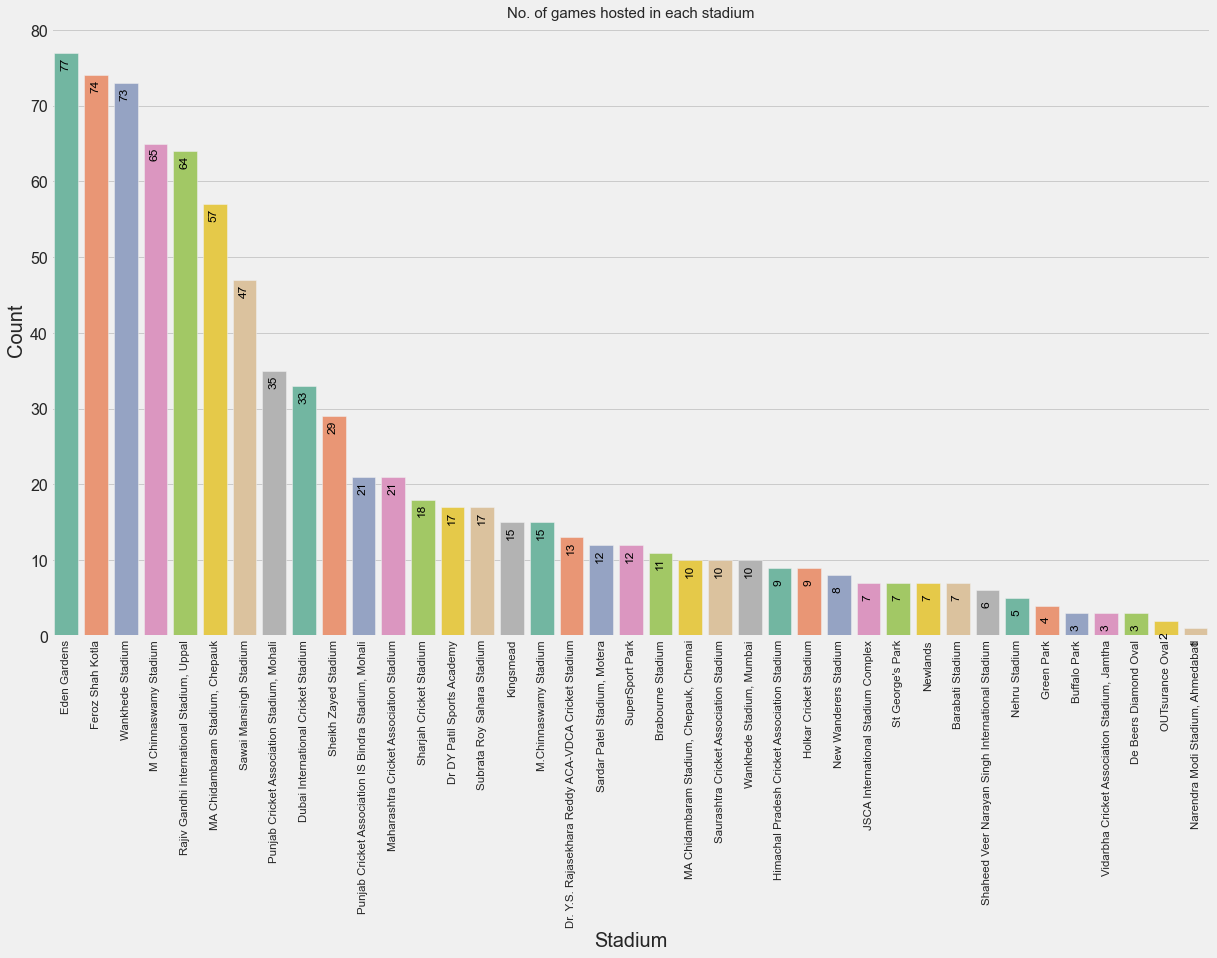

In [263]:
# Number of matches played at each Venue

fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(seasondata['venue'],order=seasondata['venue'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count=0
venues=pd.DataFrame(seasondata['venue'].value_counts())
venues['name']=seasondata['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

### Number of Matches played in each IPL Season

In [264]:
seasondata['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
2021    21
Name: season, dtype: int64

- The highest number of matches were played in the season of 2013 with 76 matches 

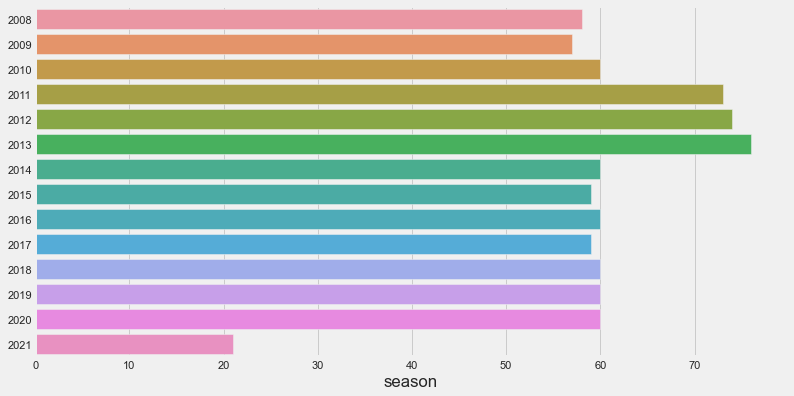

In [265]:
plt.figure(figsize=(12,6))
data = seasondata.season.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

## IPL Matches Played by Each Team


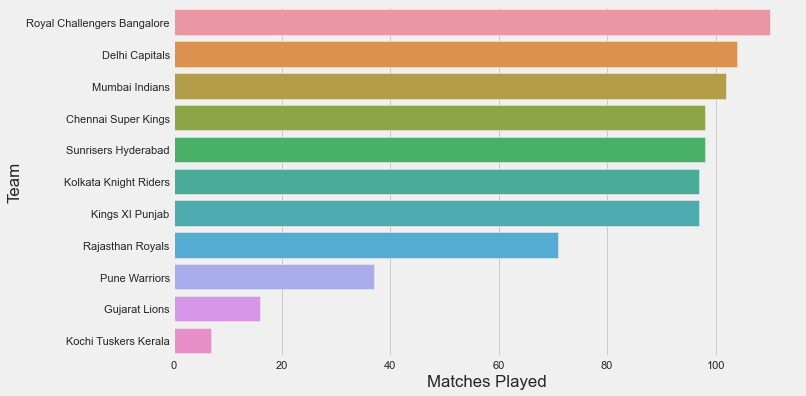

In [266]:
plt.figure(figsize=(10,6))
data = seasondata['team1'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()

### Winner Team Counts

In [267]:
#The most successful IPL Team

seasondata['winner'].value_counts().idxmax()


'Mumbai Indians'

- Mumbai Indians won the Highest number of matches i.e. 122 matches followed by Chennai Super Kings with 110 wins.

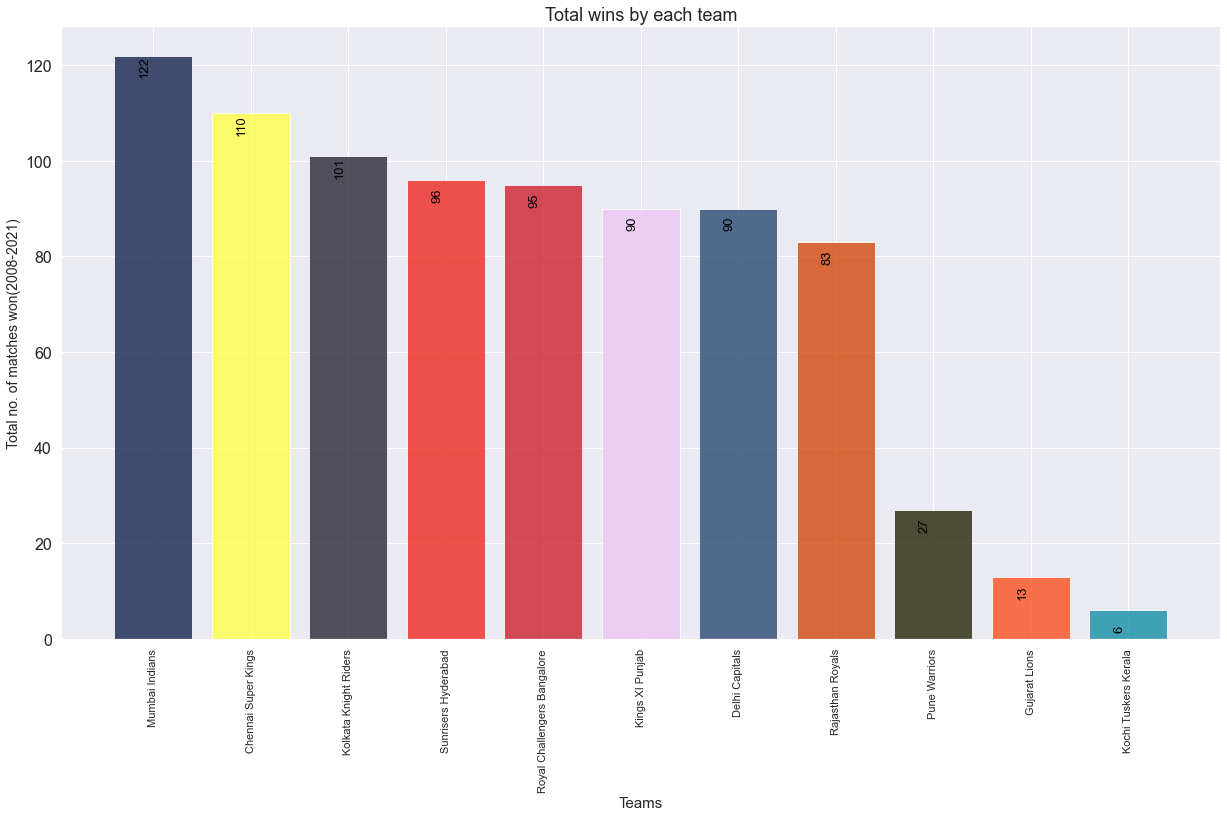

In [268]:
#Total no. of wins by each team

sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(seasondata['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=13,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=18)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2021)',fontsize=14)
plt.show()

## Matches Played vs Wins by Each Team

- Mumbai Indians have played the highest number of matches and even has the highest wins

In [269]:
matches_played=pd.concat([seasondata['team1'],seasondata['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=seasondata['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
totm = matches_played.reset_index().head(10)

trace = go.Table(
    header=dict(values=["Team","Total Matches","Wins"],
                fill = dict(color='#FFFF48'),
                font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                align = ['center'],
               height = 30),
    cells=dict(values=[totm['Team'], totm['Total Matches'], totm['wins']],
               fill = dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']),
               align = ['center'], font_size=13, height=25))

layout = dict(
    width=750,
    height=420,
    autosize=False,
    title='Total Matches vs Wins per team',
    margin = dict(t=100),
    showlegend=False,    
)

fig1 = dict(data=[trace], layout=layout)
iplot(fig1)


## Matches Played by each Team, Wins And Win Percentage

In [332]:
trace1 = go.Bar(x=matches_played.index,y=matches_played['Total Matches'],
                name='Total Matches',opacity=0.4)

trace2 = go.Bar(x=matches_played.index,y=matches_played['wins'],
                name='Matches Won',marker=dict(color='red'),opacity=0.4)

trace3 = go.Bar(x=matches_played.index,
               y=(round(matches_played['wins']/matches_played['Total Matches'],3)*100),
               name='Win Percentage',opacity=0.6,marker=dict(color='gold'))

data = [trace1, trace2, trace3]

layout = go.Layout(title='Matches Played, Wins And Win Percentage',xaxis=dict(title='Team'),
                   yaxis=dict(title='Count'),bargap=0.2,bargroupgap=0.1, plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Which Team won the highest no. of IPL Seasons

In [329]:
season_winner=seasondata.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner = season_winner['winner'].value_counts()

season_winner = season_winner.to_frame()
season_winner.reset_index(inplace=True)
season_winner.rename(columns={'index':'team'},inplace=True)

trace = go.Table(
    header=dict(values=["Team","Winner"],
                fill = dict(color = 'grey'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[season_winner['team'],season_winner['winner']],
               fill = dict(color = ['lightgreen', 'rgb(245, 245, 249)']),
               align = ['center'], font_size=13, height=25))

layout = dict(
    width=850,
    height=350,
    autosize=False,
    title='Winner Teams',
    showlegend=False    
)

fig1 = dict(data=[trace], layout=layout)
iplot(fig1)

In [331]:
#Percentage of Winner Teams of IPL seasons

trace0 = go.Pie(labels=season_winner['team'], values=season_winner['winner'],
              hoverinfo='label+value+name',name="Winner", marker=dict(line=dict(color='#000000', width=1.5)))

layout=go.Layout(title='Percentage of Winner Teams of IPL seasons')
fig = go.Figure(data=[trace0], layout=layout)
iplot(fig)

- Mumbai Indians won for 5 seasons of IPL which is 35.7% of the all seasons from 2008 to 2021.

## Toss Winner Decision to Bat or Field First

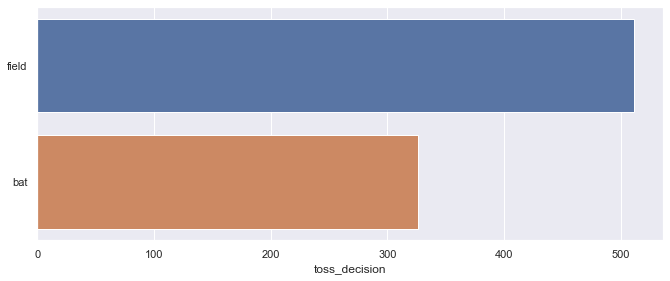

In [272]:
# Toss Winner Decision

plt.figure(figsize=(10,4))
data = seasondata.toss_decision.value_counts()
sns.barplot(y = data.index, x = data)
plt.show()

### Top 10 Players who won Man of the Match Highest Times

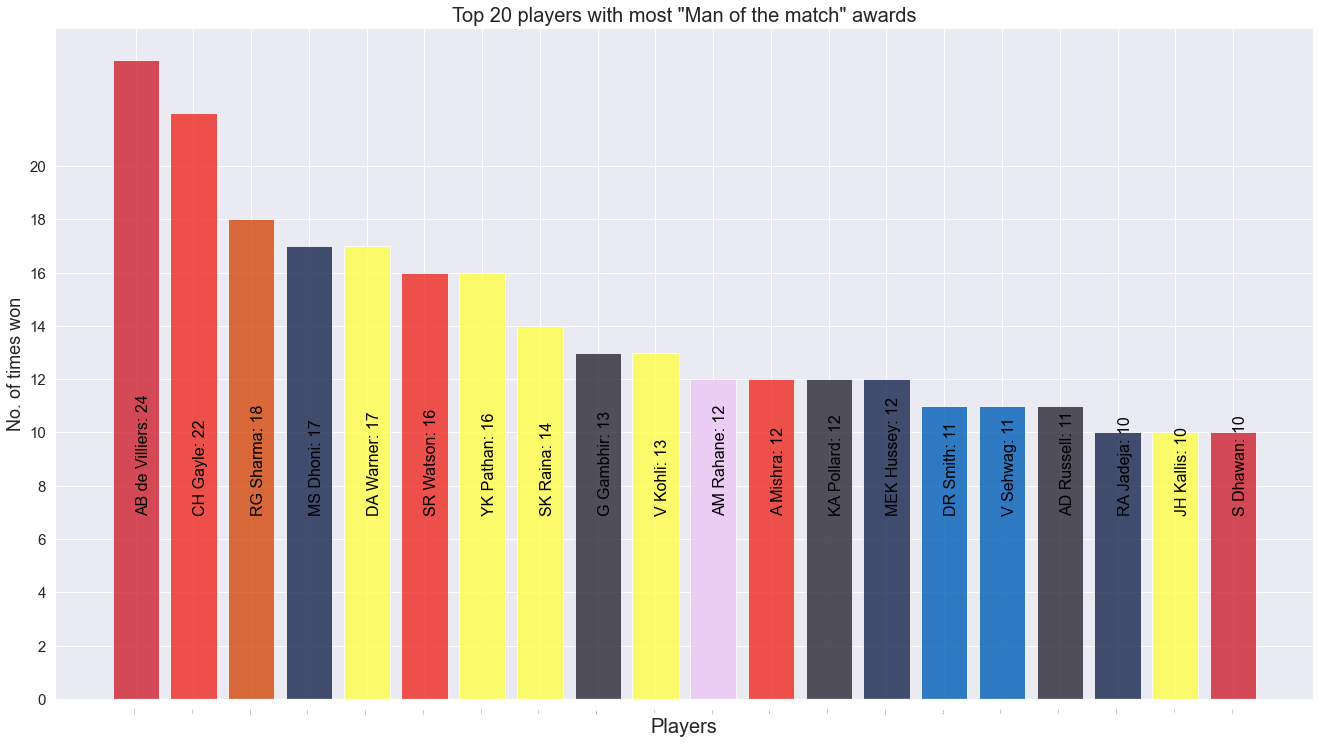

In [273]:
players=pd.DataFrame(seasondata['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=16)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

- AB de Villiers(24) have won the Highest Man of the Match Titles followed by Chris Gayle in the second Position(22). 

## Teams who batted first with most number of wins

In [274]:
#extracting the records where team that won did batting first

batting_first = seasondata[seasondata['result']=='runs']

#number of wins wrt to teams who batted first

wins = batting_first['winner'].value_counts()
wins

Mumbai Indians                 64
Chennai Super Kings            56
Sunrisers Hyderabad            52
Kolkata Knight Riders          42
Kings XI Punjab                41
Royal Challengers Bangalore    40
Delhi Capitals                 34
Rajasthan Royals               28
Pune Warriors                  13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

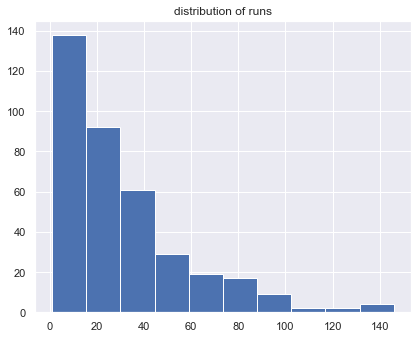

In [275]:
# Plot for distribution of Win by Runs 

plt.figure(figsize=(6,5))
plt.hist(batting_first['result_margin'])
plt.title('distribution of runs')
plt.show()

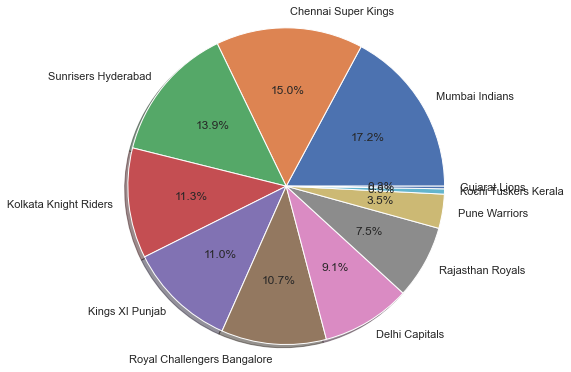

In [276]:
# Percentage wins of each team who batted first

plt.figure(figsize=(6,6))
plt.pie(batting_first['winner'].value_counts(),labels=batting_first['winner'].value_counts().keys(),shadow=True,autopct='%0.1f%%')
plt.axis('equal');

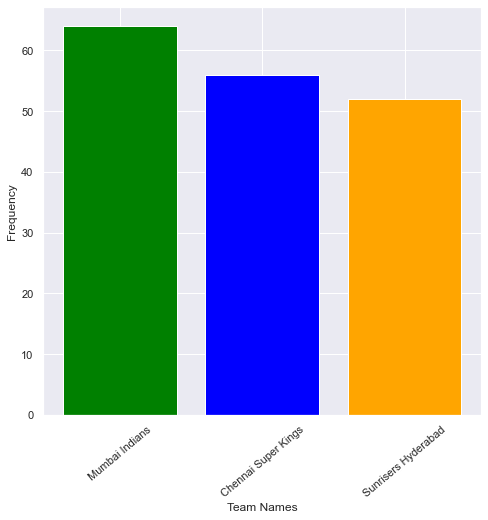

In [277]:
# plotting with top 3 teams who batted first with most number of wins

plt.figure(figsize=(7,7))
plt.bar(batting_first['winner'].value_counts()[0:3].keys(),batting_first['winner'].value_counts()[0:3],color=['green','blue','orange'])
plt.xlabel('Team Names')
plt.ylabel('Frequency')
plt.xticks(rotation=40);

## Teams who batted first with most number of wins

In [278]:
#extracting the records where team that won did fielding first

field_first  = seasondata[seasondata['result']=='wickets']

# which team won match most doing fielding first
field_first['winner'].value_counts()

Kolkata Knight Riders          58
Mumbai Indians                 56
Chennai Super Kings            54
Rajasthan Royals               53
Delhi Capitals                 53
Royal Challengers Bangalore    53
Kings XI Punjab                46
Sunrisers Hyderabad            43
Pune Warriors                  14
Gujarat Lions                  12
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

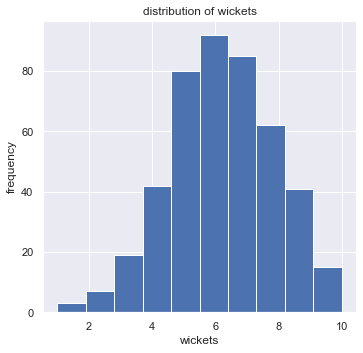

In [279]:
# plotting distribution of win by wickets for team who won and choose to do field first

plt.figure(figsize=(5,5))
plt.hist(field_first['result_margin'])
plt.title('distribution of wickets')
plt.xlabel('wickets')
plt.ylabel('frequency');

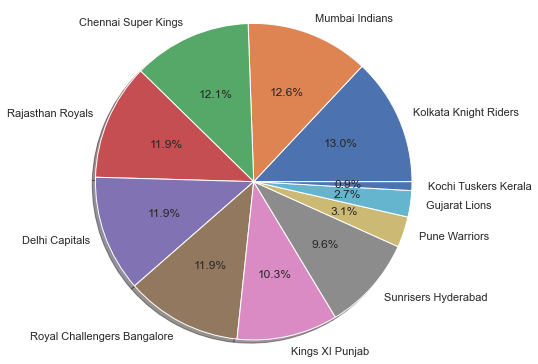

In [280]:
# Percentage wins of each team who batted second

plt.figure(figsize=(6,6))
plt.pie(field_first['winner'].value_counts(),labels=field_first['winner'].value_counts().keys(),shadow=True,autopct='%0.1f%%')
plt.axis('equal');

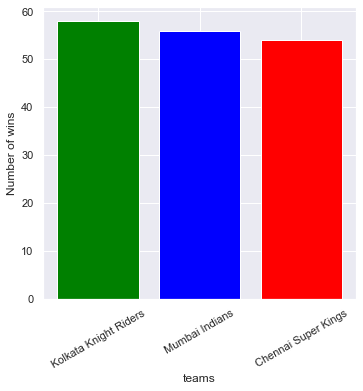

In [281]:
#plotting with top 3 teams who batted second with most number of wins

plt.figure(figsize=(5,5))
plt.bar(field_first['winner'].value_counts()[0:3].keys(),field_first['winner'].value_counts()[0:3],color=['green','blue','red']);
plt.xticks(rotation=30)
plt.xlabel('teams')
plt.ylabel('Number of wins');

## Season wise match summary of matches won by runs

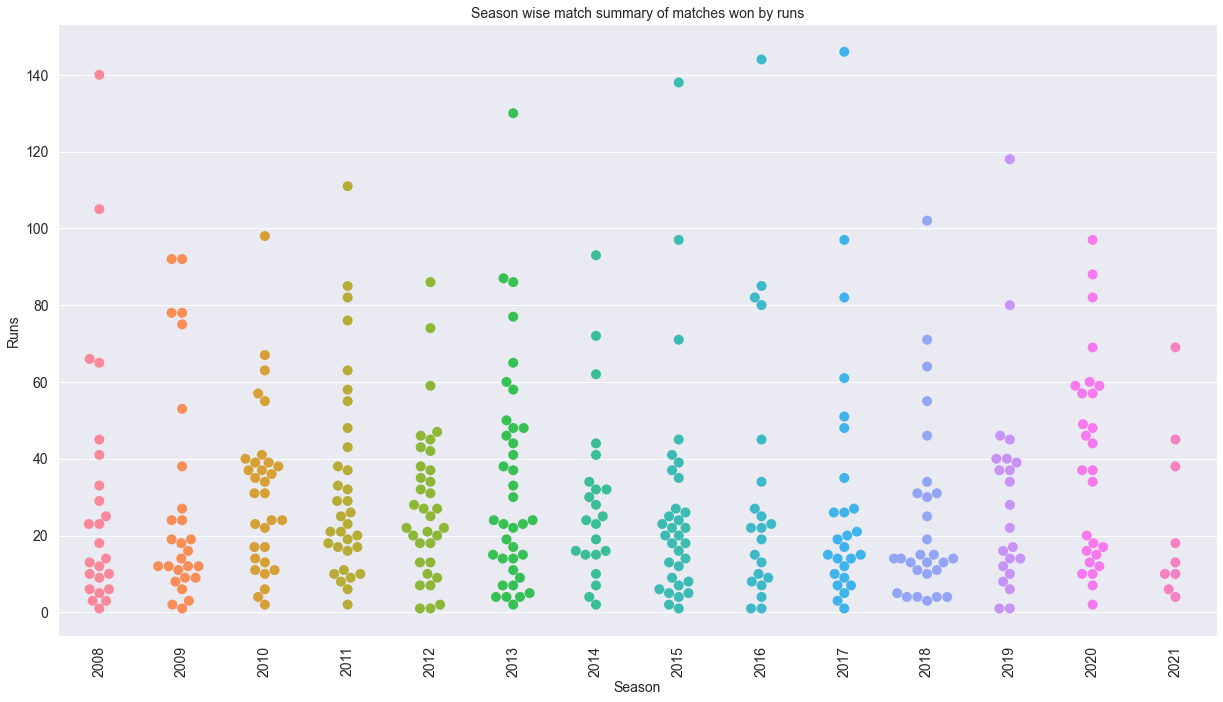

In [282]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(seasondata['season'],seasondata[seasondata['result']=='runs']['result_margin'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()

## Biggest win by runs each season

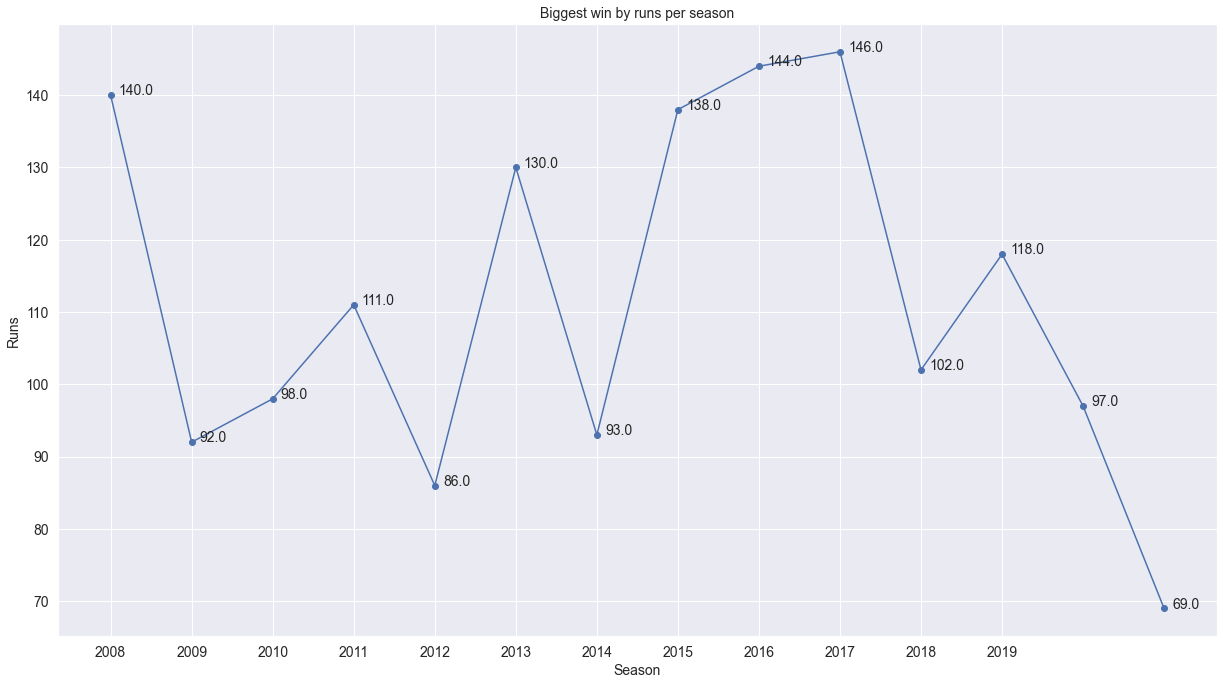

In [283]:
s=2008
season=[]
win_by_runs_max=[]
while s<2022:
    season.append(s)
    win_by_runs_max.append(seasondata[seasondata['season']==s]['result_margin'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<14:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

### Team Won by Max and Min Number of Runs and Wickets

In [284]:
#Which Team had won by Minimum Runs?

filter = batting_first['result_margin']==1
batting_first.loc[filter]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
46,336028,Mumbai,2008-05-21,SE Marsh,Wankhede Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Kings XI Punjab,runs,1.0,N,NaN,BF Bowden,GA Pratapkumar,2008
104,392229,Johannesburg,2009-05-17,Yuvraj Singh,New Wanderers Stadium,1,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,field,Kings XI Punjab,runs,1.0,N,NaN,S Ravi,RB Tiffin,2009
285,548345,Delhi,2012-04-29,V Sehwag,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,1.0,N,NaN,S Ravi,RJ Tucker,2012
291,548351,Pune,2012-05-03,SL Malinga,Subrata Roy Sahara Stadium,0,Pune Warriors,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,1.0,N,NaN,Asad Rauf,S Asnani,2012
459,829707,Chennai,2015-04-09,A Nehra,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,Chennai Super Kings,runs,1.0,N,NaN,RK Illingworth,VA Kulkarni,2015
539,980945,Delhi,2016-04-27,CH Morris,Feroz Shah Kotla,0,Delhi Capitals,Gujarat Lions,Delhi Capitals,field,Gujarat Lions,runs,1.0,N,NaN,M Erasmus,S Ravi,2016
555,980977,Chandigarh,2016-05-09,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Royal Challengers Bangalore,runs,1.0,N,NaN,AK Chaudhary,HDPK Dharmasena,2016
635,1082650,Hyderabad,2017-05-21,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",0,Mumbai Indians,Pune Warriors,Mumbai Indians,bat,Mumbai Indians,runs,1.0,N,NaN,NJ Llong,S Ravi,2017
734,1178414,Bangalore,2019-04-21,PA Patel,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,Royal Challengers Bangalore,runs,1.0,N,NaN,RJ Tucker,VA Kulkarni,2019
755,1181768,Hyderabad,2019-05-12,JJ Bumrah,"Rajiv Gandhi International Stadium, Uppal",0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,runs,1.0,N,NaN,IJ Gould,Nitin Menon,2019


In [285]:
#Which Teams had won by Maximum Runs?

filter = batting_first['result_margin']==146
batting_first.loc[filter]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [286]:
#Which Team had won by minimum wickets?

filter = field_first['result_margin']==1
field_first.loc[filter]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
500,829791,Kolkata,2015-05-09,AD Russell,Eden Gardens,0,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,bat,Kolkata Knight Riders,wickets,1.0,N,NaN,AK Chaudhary,HDPK Dharmasena,2015
636,1136561,Mumbai,2018-04-07,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,2018
642,1136567,Hyderabad,2018-04-12,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,1.0,N,NaN,NJ Llong,CK Nandan,2018


In [287]:
#Which Team had won by Maximum wickets?

filter = field_first['result_margin']==10
field_first.loc[filter]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
12,335994,Mumbai,2008-04-27,AC Gilchrist,Dr DY Patil Sports Academy,0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,Asad Rauf,SL Shastri,2008
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Capitals,Kings XI Punjab,Delhi Capitals,field,Delhi Capitals,wickets,10.0,N,D/L,MR Benson,SD Ranade,2009
124,419115,Bangalore,2010-03-18,JH Kallis,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,N,NaN,K Hariharan,DJ Harper,2010
239,501263,Mumbai,2011-05-20,SR Watson,Wankhede Stadium,0,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,Rajasthan Royals,wickets,10.0,N,NaN,RE Koertzen,PR Reiffel,2011
317,548377,Jaipur,2012-05-20,DR Smith,Sawai Mansingh Stadium,0,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,Mumbai Indians,wickets,10.0,N,NaN,HDPK Dharmasena,C Shamshuddin,2012
331,598007,Chandigarh,2013-04-10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,10.0,N,NaN,Aleem Dar,C Shamshuddin,2013
483,829757,Delhi,2015-04-26,VR Aaron,Feroz Shah Kotla,0,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,N,NaN,M Erasmus,S Ravi,2015
531,980929,Rajkot,2016-04-21,B Kumar,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,K Bharatan,HDPK Dharmasena,2016
579,1082593,Rajkot,2017-04-07,CA Lynn,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,10.0,N,NaN,Nitin Menon,CK Nandan,2017
611,1082626,Chandigarh,2017-04-30,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Delhi Capitals,Kings XI Punjab,field,Kings XI Punjab,wickets,10.0,N,NaN,YC Barde,CK Nandan,2017


# Runs per Season

## Average and Total Runs

In [288]:
batsmen = seasondata[['id','season']].merge(matchdata, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()

avgruns_each_season=seasondata.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns={'id':'matches'},inplace=1)
avgruns_each_season['total_runs']=season['total_runs']
avgruns_each_season['average_runs_per_match']=avgruns_each_season['total_runs']/avgruns_each_season['matches']

In [289]:
fig = {"data" : [{"x" : season["season"],"y" : season["total_runs"],
                  "name" : "Total Run","marker" : {"color" : "purple","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" },
        
                 {"x" : season["season"],"y" : avgruns_each_season["average_runs_per_match"],
                  "name" : "Average Run","marker" : {"color" : "orange","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2",}],
       
        "layout" : {"title": "Total and Average run per Season",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : False},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "Average Run"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Year"},
                    "yaxis" : {"domain" :[0, .45], "title": "Total Run"}}}

iplot(fig)

# Player and Ball Data  

In [319]:
matchdata = matchdata.merge(seasondata[["id", "season"]], on="id", how="inner")
matchdata.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season_x,season_y
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008,2008


In [320]:
matchdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198569 entries, 0 to 198568
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                198569 non-null  int64 
 1   inning            198569 non-null  int64 
 2   over              198569 non-null  int64 
 3   ball              198569 non-null  int64 
 4   batsman           198569 non-null  object
 5   non_striker       198569 non-null  object
 6   bowler            198569 non-null  object
 7   batsman_runs      198569 non-null  int64 
 8   extra_runs        198569 non-null  int64 
 9   total_runs        198569 non-null  int64 
 10  non_boundary      198569 non-null  int64 
 11  is_wicket         198569 non-null  int64 
 12  dismissal_kind    9764 non-null    object
 13  player_dismissed  9764 non-null    object
 14  fielder           6968 non-null    object
 15  extras_type       10500 non-null   object
 16  batting_team      198569 non-null  obj

## Run Distribution Over Years 

In [292]:

Season_boundaries=matchdata.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
fours=matchdata.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(fours,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})

Season_boundaries['6"s'] = Season_boundaries['6"s']*6
Season_boundaries['4"s'] = Season_boundaries['4"s']*4
Season_boundaries['total_runs'] = season['total_runs']

trace1 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['total_runs']-(Season_boundaries['6"s']+Season_boundaries['4"s']),
    marker = dict(line=dict(color='#000000', width=1)),
    name='Remaining runs',opacity=0.6)

trace2 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['4"s'],
    marker = dict(line=dict(color='#000000', width=1)),
    name='Run by 4"s',opacity=0.7)

trace3 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['6"s'],
    marker = dict(line=dict(color='#000000', width=1)),
    name='Run by 6"s',opacity=0.7)


data = [trace1, trace2, trace3]
layout = go.Layout(title="Run Distribution per year",barmode='stack',xaxis = dict(tickmode='linear',title="Year"),
                                    yaxis = dict(title= "Run Distribution"), plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Target of 200 Runs or More

In [293]:
high_scores=matchdata.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
hss = high_scores.nlargest(10,'total_runs')

trace = go.Table(
    header=dict(values=["Inning","Batting Team","Bowling Team", "Total Runs"],
                fill = dict(color = 'Blue'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[hss['inning'], hss['batting_team'], hss['bowling_team'], hss['total_runs']],
               fill = dict(color = ['lightsalmon', 'rgb(245, 245, 249)']),
               align = ['center'], font_size=13))

layout = dict(
    width=830,
    height=410,
    autosize=False,
    title='Highest scores of IPL',
    showlegend=False,    
)

fig1 = dict(data=[trace], layout=layout)
iplot(fig1)

In [294]:
df_strike_rate = matchdata.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)
df_runs_per_match = matchdata.groupby(['batsman','id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()
df_sixes = matchdata[['batsman','batsman_runs']][matchdata.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = matchdata[['batsman','batsman_runs']][matchdata.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

df_batsman_stat.rename(columns = {'ball' : 'ball', 'strike rate':'strike_rate','batsman run' : 'batsman_run',
                                  'match count' : 'match_count','average score' : 'average_score' ,'batsman_runs_x' :'six',
                                  'batsman_runs_y':'four'},inplace=True)
df_batsman_stat['strike_rate'] = df_batsman_stat['strike_rate']*100
df_batsman_stat.sort_values(by='batsman_run',ascending=False,inplace=True)

#df_batsman_stat.sort_values(by='batsman_run',ascending=False)
df_batsman_stat.reset_index(inplace=True)



## Players with Highest Average and Strike rate for more than 50 Matches

In [295]:
average_score=df_batsman_stat.sort_values(by='average_score',ascending=False)
average_score=average_score[average_score['match_count']>50].head(10)

strike_rate=df_batsman_stat.sort_values(by='strike_rate',ascending=False)
strike_rate=strike_rate[strike_rate['match_count']>50].head(10)

trace1 = go.Bar(x=average_score['batsman'],y=average_score['average_score'],
                name='Average Score',marker=dict(color='orange', line=dict(color='#000000', width=1.5)),opacity=0.6,showlegend=False)

trace2 = go.Bar(x=strike_rate['batsman'],y=strike_rate['strike_rate'],
                name='Strike Rate',marker=dict(color='purple', line=dict(color='#000000', width=1.5)),opacity=0.6,showlegend=False)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Highest Average Score','Highest Strike Rate'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout']['xaxis1'].update(title='Player')
fig['layout']['xaxis2'].update(title='Player')

iplot(fig)


## Top Batsmen

In [296]:
# Top 5 batsmen 

top_df_batsman=df_batsman_stat.head(20)
top_df_batsman.head(5)

,batsman,ball,strike_rate,average_score,batsman_run,match_count,six,four
0,V Kohli,4729,127.489956,31.899471,6029,189,205,520
1,SK Raina,4122,132.751092,28.352332,5472,193,202,499
2,S Dhawan,4393,124.197587,30.311111,5456,180,114,623
3,RG Sharma,4243,127.999057,27.291457,5431,199,223,472
4,DA Warner,3944,136.663286,36.666667,5390,147,199,522


In [297]:
# Top 20 Batsmen 

data=[{"y": top_df_batsman.match_count,
        "x": top_df_batsman.batsman,
        "mode":"markers",
        "marker":{"color":top_df_batsman.six,"size" :top_df_batsman.average_score,'showscale': True},
        "text":top_df_batsman.batsman }]

iplot(data)

- Virat Kohli has highest total runs across all seasons. Raina is just few runs behind with the second spot

##  Top 10 Batsmen Scoring Highest Fours and Sixes

In [298]:
toppers=matchdata.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
toppers.reset_index(inplace=True)

top_6 = toppers.sort_values(6,ascending=False).head(10)
top_4 = toppers.sort_values(4,ascending=False).head(10)

trace1 = go.Scatter(x=top_6.batsman,y =top_6[6],name='6"s',marker =dict(color= "green",size = 9),line=dict(width=2,dash='dash'))
trace2 = go.Scatter(x=top_4.batsman,y = top_4[4],name='4"s',marker =dict(color= "purple",size = 9),line=dict(width=2,dash='longdash'))

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Top 6s Scorer','Top 4s Scorer'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)


fig['layout'].update(title='Top Scorer in each Category',showlegend=False, plot_bgcolor='rgb(245,245,245)')
iplot(fig)


- Chris Gayle has scored the highest 6's(623) and ranks in the top 10 batsem having highest number of 4's(397).
- Shikhar Dhawan has scored the highest 4's(623) followed by Warner(522).
- Virat Kholi having the highest runs in the overall IPL has scored 205 6's and 520 4's.

## Orange Cap Holders for each Season

In [325]:
# Orange Cap in IPL is awarded to the player who scores the highest number of runs in the season.

df=seasondata[['id','season']]
df=df.merge(matchdata,left_on='id',right_on='id',how='left')
df=df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
df=df.sort_values('batsman_runs',ascending=0)
df=df.drop_duplicates(subset=['season'],keep="first") 
#orange.sort_values(by='season') 

data = [go.Bar(x=df['season'].values,y=df['batsman_runs'].values,
                name='Total Matches',text=df['batsman'].values,
                marker=dict(color='rgb(255,140,0)',
                            line=dict(color='rgb(8,48,107)',width=1.5,)),opacity=0.7)]

layout = go.Layout(title='Orange-Cap Holders',xaxis = dict(tickmode='linear',title="Year"),
                   yaxis=dict(title='Runs'), plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Top 10 Bowlers with Highest Wickets

In [317]:
bowlers=matchdata.groupby('bowler').sum().reset_index()
bowl=matchdata['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)

dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=matchdata[matchdata["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])

bowlers_top=bowlers.sort_values(by='runs_given',ascending=False)
bowlers_top=bowlers_top.head(10)

trace = go.Scatter(y = bowlers_top['wickets'],x = bowlers_top['bowler'],mode='markers',
                   marker=dict(size= bowlers_top['wickets'].values,
                               color = bowlers_top['economy'].values,
                               colorscale='Viridis',
                               showscale=True,
                               colorbar = dict(title = 'Economy')),
                   text = bowlers['overs'].values)

data = [(trace)]

layout= go.Layout(autosize= True,
                  title= 'Top 10 Wicket Taking Bowlers',
                  hovermode= 'closest',
                  xaxis=dict(showgrid=False,zeroline=False,
                             showline=False),
                  yaxis=dict(title= 'Wickets Taken',ticklen= 5,
                             gridwidth= 3,showgrid=False,
                             zeroline=False,showline=False),
                  showlegend= False,plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

- Malinga has taken the Highest number of wickets (170), followed by A Mishra with 165 wickets.

In [327]:
bowling_wickets=matchdata[matchdata['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

trace1 = go.Scatter(
    x = top_bowlers['bowler'].values,
    y = top_bowlers['Wickets'].values,
    mode = 'lines+markers',
)

layout = go.Layout(title="Top 10 Bowlers in IPL- Seasons 2008-2021",
                   xaxis=dict(title="TOP 10 Bowlers"),
                   yaxis=dict(title="Wickets Taken"),
                  plot_bgcolor='rgb(245,245,245)')


data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Purple Cap Holders for Each season

In [324]:
#The award is given to the leading wicket taker of the IPL season. 
# The bowler with the most wickets in the tournament during the season would wear the Purple Cap while in the field.

dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
df=matchdata[matchdata["dismissal_kind"].isin(dismissal_kinds)]
df=df.merge(seasondata,left_on='id',right_on='id',how='outer')
df=df.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
df=df.sort_values('dismissal_kind',ascending=False)
df=df.drop_duplicates('season',keep='first').sort_values(by='season')
df.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

trace1 = go.Bar(x=df['season'].values,y=df['count_wickets'].values,
                name='Total Matches',text=df['bowler'].values,
                marker=dict(color='rgb(75,0,130)',
                            line=dict(color='#000000',width=1.5,)),
                opacity=0.4)

layout = go.Layout(title='Purple-Cap Holders',xaxis = dict(tickmode='linear',title="Year"),
                   yaxis=dict(title='Wickets'), plot_bgcolor='rgb(245,245,245)')

data=[trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Aggregated Batsman Data with Match Id

In [17]:
        batsmen_score = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs"})
        batsmen_scores_30 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=30).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_30"})
        batsmen_scores_50 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=50).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_50"})
        batsmen_scores_100 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=100).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_100"})
        batsmen_scores_0 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())==0).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_0"})
        batsmen_ball_faced = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['over'].count()).\
            rename(columns={"over": "total_balls_faced"})
        batsmen_ball_faced_legal = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['id', 'batsman'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_faced"})
        batsmen_scores6 = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 6].groupby(['id', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_6"})
        batsmen_scores4 = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 4].groupby(['id', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_4"})
        batsmen_position = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['is_wicket'].min())
       
        
        df_list = [batsmen_score, batsmen_ball_faced, batsmen_ball_faced_legal, batsmen_scores6, batsmen_scores4, batsmen_position,batsmen_scores_30,batsmen_scores_50,batsmen_scores_100,batsmen_scores_0]
        batsmen_summary = pd.concat(df_list, join='outer', axis=1).fillna(np.nan).reset_index()
        batsmen_summary = pd.merge(batsmen_summary, matchdata[['id', 'batsman', 'inning', 'batting_team', 'bowling_team']].
                                   drop_duplicates(), on=['id', 'batsman'], how='left')
        batsmen_summary.rename(columns={'inning': 'batsmen_innings', 'batsman': 'playername', 'batting_team': 'Playing Team',
                                        'bowling_team': 'Opponent Team'}, inplace=True)
       

In [15]:
batsmen_summary

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,total_runs_100,total_runs_0,batsmen_innings,Playing Team,Opponent Team
0,335982,AA Noffke,9,12,11.0,NaN,1.0,0,0,0,0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,B Akhil,0,2,2.0,NaN,NaN,0,0,0,0,1,2,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,BB McCullum,158,77,73.0,13.0,10.0,0,1,1,1,0,1,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,CL White,6,10,8.0,NaN,NaN,0,0,0,0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,DJ Hussey,12,12,12.0,NaN,1.0,0,0,0,0,0,1,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12486,1254078,N Rana,0,1,1.0,NaN,NaN,1,0,0,0,1,2,Kolkata Knight Riders,Punjab Kings
12487,1254078,RA Tripathi,41,32,32.0,NaN,7.0,0,1,0,0,0,2,Kolkata Knight Riders,Punjab Kings
12488,1254078,Ravi Bishnoi,1,5,4.0,NaN,NaN,0,0,0,0,0,1,Punjab Kings,Kolkata Knight Riders
12489,1254078,SP Narine,0,5,4.0,NaN,NaN,0,0,0,0,1,2,Kolkata Knight Riders,Punjab Kings


# Bowler Data Aggregated with Match Id

In [18]:
        bowler_wickets = pd.DataFrame(matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count()).\
            rename(columns={"is_wicket": "total_wickets"})
        bowler_overs_bow = pd.DataFrame(matchdata.groupby(['id', 'bowler'])['over'].count()).\
            rename(columns={"over": "total_balls_bowled"})
        bowler_ball_faced_legal = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['id', 'bowler'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_bowled"})
        # calculating the number of maiden overs bowled in a match
        bowler_runs_given = pd.DataFrame(matchdata.groupby(['id', 'bowler'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs_given"})
        bowler_wickets_3 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==3).astype(int).\
            rename(columns={"is_wicket": "total_wickets_3"})
        bowler_wickets_4 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==4).astype(int).\
            rename(columns={"is_wicket": "total_wickets_4"})
        bowler_wickets_5 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==5).astype(int).\
            rename(columns={"is_wicket": "total_wickets_5"})
        bowler_maiden = pd.DataFrame(matchdata.groupby(['id', 'bowler', 'over'])['total_runs'].sum()).reset_index()
        bowler_maiden['maiden_overs'] = np.where(bowler_maiden['total_runs'] == 0, 1, 0)
        bowler_maiden = bowler_maiden.groupby(['id', 'bowler'])['maiden_overs'].sum()
        
        #legbyes to be considered
        
        df_list = [bowler_wickets, bowler_overs_bow, bowler_ball_faced_legal, bowler_runs_given,bowler_wickets_3,bowler_wickets_4,bowler_wickets_5,bowler_maiden]
        bowler_summary = pd.concat(df_list, join='outer', axis=1).fillna(np.nan).reset_index()
        # adding additional columns just in case we need for modeling
        bowler_summary = pd.merge(bowler_summary, matchdata[['id', 'bowler', 'inning', 'batting_team', 'bowling_team']].drop_duplicates(), on=['id', 'bowler'], how='left')
        bowler_summary.rename(columns={'inning': 'bowlers_innings', 'bowler': 'playername', 'batting_team': 'Playing team',
                                       'bowling_team': 'Opponent Team'}, inplace=True)
        bowler_summary['economy_rate'] = (bowler_summary['total_runs_given'] * 6) / bowler_summary['total_legal_balls_bowled']
        bowler_summary['eco less than 5'] = (bowler_summary['economy_rate']<=5).astype(int)
        bowler_summary['eco 5-5.99'] = ((bowler_summary['economy_rate']<6)&(bowler_summary['economy_rate']>=5)).astype(int)
        bowler_summary['eco 6-7'] = ((bowler_summary['economy_rate']>=6)&(bowler_summary['economy_rate']<7)).astype(int)
        bowler_summary['eco 7-10'] = ((bowler_summary['economy_rate']>=7)&(bowler_summary['economy_rate']<10)).astype(int)
        bowler_summary['eco 11-12'] = ((bowler_summary['economy_rate']>=11)&(bowler_summary['economy_rate']<12)).astype(int)
        bowler_summary['eco greater than 12'] = (bowler_summary['economy_rate']>12).astype(int)
        
        
        

In [75]:
bowler_summary

,id,playername,total_wickets,total_balls_bowled,total_legal_balls_bowled,total_runs_given,total_wickets_3,total_wickets_4,total_wickets_5,maiden_overs,bowlers_innings,Playing team,Opponent Team,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12
0,335982,AA Noffke,1.0,25,24,35,0.0,0.0,0.0,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,8.750000,0,0,0,1,0,0
1,335982,AB Agarkar,3.0,28,24,21,1.0,0.0,0.0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,5.250000,0,1,0,0,0,0
2,335982,AB Dinda,2.0,20,18,7,0.0,0.0,0.0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,2.333333,1,0,0,0,0,0
3,335982,CL White,NaN,7,6,22,NaN,NaN,NaN,0,1,Kolkata Knight Riders,Royal Challengers Bangalore,22.000000,0,0,0,0,0,1
4,335982,I Sharma,1.0,19,18,6,0.0,0.0,0.0,0,2,Royal Challengers Bangalore,Kolkata Knight Riders,2.000000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9662,1237181,MP Stoinis,1.0,12,12,23,0.0,0.0,0.0,0,2,Mumbai Indians,Delhi Capitals,11.500000,0,0,0,0,1,0
9663,1237181,NM Coulter-Nile,2.0,25,24,28,0.0,0.0,0.0,0,1,Delhi Capitals,Mumbai Indians,7.000000,0,0,0,1,0,0
9664,1237181,P Dubey,NaN,18,18,29,NaN,NaN,NaN,0,2,Mumbai Indians,Delhi Capitals,9.666667,0,0,0,1,0,0
9665,1237181,R Ashwin,NaN,24,24,28,NaN,NaN,NaN,0,2,Mumbai Indians,Delhi Capitals,7.000000,0,0,0,1,0,0


In [76]:
fielder_data = pd.DataFrame(matchdata[((matchdata['is_wicket'] == 1) & (matchdata['dismissal_kind'].isin(['caught','caught and bowled','run out','stumped'])))].
                                      groupby(['id','fielder','dismissal_kind'])['is_wicket'].count()).\
            rename(columns={"is_wicket": "Fielding_stats"})

# Batsman,Bowler Merged Statistics

In [77]:
ipl_merged_scorecard = pd.merge(batsmen_summary, bowler_summary, on=['id', 'playername'], how='outer')

In [78]:
ipl_merged_scorecard

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,bowlers_innings,Playing team,Opponent Team_y,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12
0,335982,AA Noffke,9.0,12.0,11.0,NaN,1.0,0.0,0.0,0.0,...,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,8.750000,0.0,0.0,0.0,1.0,0.0,0.0
1,335982,B Akhil,0.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,CL White,6.0,10.0,8.0,NaN,NaN,0.0,0.0,0.0,...,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,22.000000,0.0,0.0,0.0,0.0,0.0,1.0
4,335982,DJ Hussey,12.0,12.0,12.0,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,10.666667,0.0,0.0,0.0,0.0,0.0,0.0
17147,1237181,NM Coulter-Nile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Delhi Capitals,Mumbai Indians,7.000000,0.0,0.0,0.0,1.0,0.0,0.0
17148,1237181,P Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,9.666667,0.0,0.0,0.0,1.0,0.0,0.0
17149,1237181,R Ashwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,7.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
for col in list_of_cols:
  #ipl_merged_scorecard.loc[ ipl_merged_scorecard[col].isnull() , col ] = 0
  ipl_merged_scorecard[col].fillna(0, inplace=True)
ipl_merged_scorecard.isnull().sum()

NameError: name 'list_of_cols' is not defined

In [80]:
ipl_merged_scorecard

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,bowlers_innings,Playing team,Opponent Team_y,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12
0,335982,AA Noffke,9.0,12.0,11.0,NaN,1.0,0.0,0.0,0.0,...,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,8.750000,0.0,0.0,0.0,1.0,0.0,0.0
1,335982,B Akhil,0.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,CL White,6.0,10.0,8.0,NaN,NaN,0.0,0.0,0.0,...,1.0,Kolkata Knight Riders,Royal Challengers Bangalore,22.000000,0.0,0.0,0.0,0.0,0.0,1.0
4,335982,DJ Hussey,12.0,12.0,12.0,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,10.666667,0.0,0.0,0.0,0.0,0.0,0.0
17147,1237181,NM Coulter-Nile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Delhi Capitals,Mumbai Indians,7.000000,0.0,0.0,0.0,1.0,0.0,0.0
17148,1237181,P Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,9.666667,0.0,0.0,0.0,1.0,0.0,0.0
17149,1237181,R Ashwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Mumbai Indians,Delhi Capitals,7.000000,0.0,0.0,0.0,1.0,0.0,0.0


# Batsman, Bowler, All Rounder Classification

In [81]:
        MINAVGBALLSFACED = 8
        MINAVGBOWLSBOWLED = 6
        player_avg = ipl_merged_scorecard[['playername', 'total_balls_faced', 'total_balls_bowled']].fillna(0)
        player_avg = pd.DataFrame(player_avg.groupby('playername')[['total_balls_faced', 'total_balls_bowled']].mean())
        conditions = [((player_avg['total_balls_faced'] >= MINAVGBALLSFACED) & (player_avg['total_balls_bowled'] >= MINAVGBOWLSBOWLED)),
                      (player_avg['total_balls_bowled'] >= MINAVGBOWLSBOWLED)]
        choices = ['AllRounder', 'Bowler']
        player_avg['playing_role'] = np.select(conditions, choices, default='Batsmen')
        player_avg = player_avg.reset_index()

In [82]:
pointsconfig = {
        'total_runs': 1,
        'run_6': 2,
        'run_4': 1,
        '>=30':4,
        '>=50': 8,
        '>=100': 16,
        'duck': -2,
        'total_wickets': 25,
        '<=3W':4,
        '>=4W': 8,
        '>=5W': 16,
        'maiden_overs': 8,
        '<=5E': 6,
        '<6E': 4,
        '<7E': 2,
        '>10E': -2,
        '>11E': -4,
        '>12E': -6
    }

In [83]:
        ipl_merged_scorecard['total_runs_points'] = ipl_merged_scorecard['total_runs'] * pointsconfig['total_runs']
        ipl_merged_scorecard['run_6_points'] = pointsconfig['run_6'] *  ipl_merged_scorecard['run_6']
        ipl_merged_scorecard['run_4_points'] = pointsconfig['run_4'] *  ipl_merged_scorecard['run_4']
        ipl_merged_scorecard['30_Run_Points'] = pointsconfig['>=30'] *  ipl_merged_scorecard['total_runs_30']
        ipl_merged_scorecard['50_Run_Points'] = pointsconfig['>=50'] *  ipl_merged_scorecard['total_runs_50']
        ipl_merged_scorecard['100_Run_Points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_runs_100']
        ipl_merged_scorecard['duck_Points'] = pointsconfig['duck'] *  ipl_merged_scorecard['total_runs_0']
        ipl_merged_scorecard['total_bat_points'] = np.nan
        ipl_merged_scorecard['total_bat_points'] = ipl_merged_scorecard['total_runs_points'].add(ipl_merged_scorecard['run_6_points'], fill_value=0). \
            add(ipl_merged_scorecard['run_4_points'], fill_value=0).add(ipl_merged_scorecard['30_Run_Points'], fill_value=0).\
            add(ipl_merged_scorecard['50_Run_Points'], fill_value=0).add(ipl_merged_scorecard['100_Run_Points'], fill_value=0).\
            add(ipl_merged_scorecard['duck_Points'], fill_value=0)
        ipl_merged_scorecard['total_bat_points'] = np.where(ipl_merged_scorecard['total_balls_faced'] >= 1, ipl_merged_scorecard['total_bat_points'], np.nan)

In [84]:
ipl_merged_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17151 entries, 0 to 17150
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17151 non-null  int64  
 1   playername                17151 non-null  object 
 2   total_runs                12162 non-null  float64
 3   total_balls_faced         12162 non-null  float64
 4   total_legal_balls_faced   12111 non-null  float64
 5   run_6                     4530 non-null   float64
 6   run_4                     7451 non-null   float64
 7   is_wicket                 12162 non-null  float64
 8   total_runs_30             12162 non-null  float64
 9   total_runs_50             12162 non-null  float64
 10  total_runs_100            12162 non-null  float64
 11  total_runs_0              12162 non-null  float64
 12  batsmen_innings           12162 non-null  float64
 13  Playing Team              12162 non-null  object 
 14  Oppone

In [85]:
        ipl_merged_scorecard['total_wicket_points'] = ipl_merged_scorecard['total_wickets'] * pointsconfig['total_wickets']
        ipl_merged_scorecard['<=5E_points'] = pointsconfig['<=5E'] *  ipl_merged_scorecard['eco less than 5']
        ipl_merged_scorecard['<6E_points'] = pointsconfig['<6E'] *  ipl_merged_scorecard['eco 5-5.99']
        ipl_merged_scorecard['<7E_points'] = pointsconfig['<7E'] *  ipl_merged_scorecard['eco 6-7']
        ipl_merged_scorecard['>10E_points'] = pointsconfig['>10E'] *  ipl_merged_scorecard['eco 7-10']
        ipl_merged_scorecard['>11E_points'] = pointsconfig['>11E'] *  ipl_merged_scorecard['eco 11-12']
        ipl_merged_scorecard['>12E_points'] = pointsconfig['>12E'] *  ipl_merged_scorecard['eco greater than 12']
        ipl_merged_scorecard['3W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_3']
        ipl_merged_scorecard['4W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_4']
        ipl_merged_scorecard['5W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_5']
        ipl_merged_scorecard['maiden_overs_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['maiden_overs']
        ipl_merged_scorecard['total_bowl_points'] = np.nan
        ipl_merged_scorecard['total_bowl_points'] = ipl_merged_scorecard['total_wicket_points'].add(ipl_merged_scorecard['<=5E_points'], fill_value=0). \
            add(ipl_merged_scorecard['<6E_points'], fill_value=0).add(ipl_merged_scorecard['<7E_points'], fill_value=0).\
            add(ipl_merged_scorecard['>10E_points'], fill_value=0).add(ipl_merged_scorecard['>11E_points'], fill_value=0).\
            add(ipl_merged_scorecard['>12E_points'], fill_value=0).add(ipl_merged_scorecard['3W_points'], fill_value=0).\
            add(ipl_merged_scorecard['4W_points'], fill_value=0).add(ipl_merged_scorecard['5W_points'], fill_value=0).\
            add(ipl_merged_scorecard['maiden_overs_points'], fill_value=0)
        ipl_merged_scorecard['total_bowl_points'] = np.where(ipl_merged_scorecard['total_bowls_bowled'] >= 1, ipl_merged_scorecard['total_bowl_points'], np.nan)

KeyError: 'total_bowls_bowled'

In [86]:
ipl_merged_scorecard

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,<6E_points,<7E_points,>10E_points,>11E_points,>12E_points,3W_points,4W_points,5W_points,maiden_overs_points,total_bowl_points
0,335982,AA Noffke,9.0,12.0,11.0,NaN,1.0,0.0,0.0,0.0,...,0.0,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,23.0
1,335982,B Akhil,0.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,CL White,6.0,10.0,8.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-6.0,NaN,NaN,NaN,0.0,-6.0
4,335982,DJ Hussey,12.0,12.0,12.0,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,25.0
17147,1237181,NM Coulter-Nile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,48.0
17148,1237181,P Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,-2.0,-0.0,-0.0,NaN,NaN,NaN,0.0,-2.0
17149,1237181,R Ashwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,-2.0,-0.0,-0.0,NaN,NaN,NaN,0.0,-2.0


In [87]:
ipl_merged_scorecard['total_points'] = ipl_merged_scorecard['total_bat_points'].add(ipl_merged_scorecard['total_bowl_points'], fill_value=0)

In [88]:
ipl_merged_scorecard

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,<7E_points,>10E_points,>11E_points,>12E_points,3W_points,4W_points,5W_points,maiden_overs_points,total_bowl_points,total_points
0,335982,AA Noffke,9.0,12.0,11.0,NaN,1.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,23.0,33.0
1,335982,B Akhil,0.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.0
3,335982,CL White,6.0,10.0,8.0,NaN,NaN,0.0,0.0,0.0,...,0.0,-0.0,-0.0,-6.0,NaN,NaN,NaN,0.0,-6.0,0.0
4,335982,DJ Hussey,12.0,12.0,12.0,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,25.0,25.0
17147,1237181,NM Coulter-Nile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,48.0,48.0
17148,1237181,P Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-2.0,-0.0,-0.0,NaN,NaN,NaN,0.0,-2.0,-2.0
17149,1237181,R Ashwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-2.0,-0.0,-0.0,NaN,NaN,NaN,0.0,-2.0,-2.0


In [89]:
ipl_merged_scorecard.fillna(0)

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,<7E_points,>10E_points,>11E_points,>12E_points,3W_points,4W_points,5W_points,maiden_overs_points,total_bowl_points,total_points
0,335982,AA Noffke,9.0,12.0,11.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,23.0,33.0
1,335982,B Akhil,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0
3,335982,CL White,6.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,-6.0,0.0,0.0,0.0,0.0,-6.0,0.0
4,335982,DJ Hussey,12.0,12.0,12.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,25.0,25.0
17147,1237181,NM Coulter-Nile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,48.0,48.0
17148,1237181,P Dubey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-2.0,-2.0
17149,1237181,R Ashwin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-2.0,-2.0


In [66]:
ipl_merged_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17151 entries, 0 to 17150
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17151 non-null  int64  
 1   playername                17151 non-null  object 
 2   total_runs                12162 non-null  float64
 3   total_balls_faced         12162 non-null  float64
 4   total_legal_balls_faced   12111 non-null  float64
 5   run_6                     4530 non-null   float64
 6   run_4                     7451 non-null   float64
 7   is_wicket                 12162 non-null  float64
 8   total_runs_30             12162 non-null  float64
 9   total_runs_50             12162 non-null  float64
 10  total_runs_100            12162 non-null  float64
 11  total_runs_0              12162 non-null  float64
 12  batsmen_innings           12162 non-null  float64
 13  Playing Team              12162 non-null  object 
 14  Oppone

In [25]:
from sklearn.model_selection import train_test_split

In [35]:
for col in ipl_merged_scorecard.columns:
    print(col)

id
playername
total_runs
total_balls_faced
total_legal_balls_faced
run_6
run_4
is_wicket
total_runs_30
total_runs_50
total_runs_100
total_runs_0
batsmen_innings
Playing Team
Opponent Team_x
total_wickets
total_balls_bowled
total_legal_balls_bowled
total_runs_given
total_wickets_3
total_wickets_4
total_wickets_5
maiden_overs
bowlers_innings
Playing team
Opponent Team_y
economy_rate
eco less than 5
eco 5-5.99
eco 6-7
eco 7-10
eco 11-12
eco greater than 12
total_runs_points
run_6_points
run_4_points
30_Run_Points
50_Run_Points
100_Run_Points
duck_Points
total_bat_points
total_wicket_points
<=5E_points
<6E_points
<7E_points
>10E_points
>11E_points
>12E_points
3W_points
4W_points
5W_points
maiden_overs_points
total_bowl_points
total_points


In [26]:
ipl_merged_scorecard.replace([np.inf, -np.inf], np.nan, inplace=True)

In [27]:
ipl_merged_scorecard.fillna(0,inplace=True)

In [28]:
ipl_merged_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17151 entries, 0 to 17150
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17151 non-null  int64  
 1   playername                17151 non-null  object 
 2   total_runs                17151 non-null  float64
 3   total_balls_faced         17151 non-null  float64
 4   total_legal_balls_faced   17151 non-null  float64
 5   run_6                     17151 non-null  float64
 6   run_4                     17151 non-null  float64
 7   is_wicket                 17151 non-null  float64
 8   total_runs_30             17151 non-null  float64
 9   total_runs_50             17151 non-null  float64
 10  total_runs_100            17151 non-null  float64
 11  total_runs_0              17151 non-null  float64
 12  batsmen_innings           17151 non-null  float64
 13  Playing Team              17151 non-null  object 
 14  Oppone

In [29]:
ipl_merged_scorecard

,id,playername,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,<7E_points,>10E_points,>11E_points,>12E_points,3W_points,4W_points,5W_points,maiden_overs_points,total_bowl_points,total_points
0,335982,AA Noffke,9.0,12.0,11.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,23.0,33.0
1,335982,B Akhil,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.0
3,335982,CL White,6.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,-6.0,0.0,0.0,0.0,0.0,-6.0,0.0
4,335982,DJ Hussey,12.0,12.0,12.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,25.0,25.0
17147,1237181,NM Coulter-Nile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,48.0,48.0
17148,1237181,P Dubey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-2.0,-2.0
17149,1237181,R Ashwin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-2.0,-2.0


In [30]:
X = ipl_merged_scorecard[['total_runs','run_6','run_4','total_runs_30','total_runs_50','total_runs_100','total_runs_30','total_wickets','total_balls_bowled','total_wickets_3','total_wickets_4','total_wickets_5','maiden_overs','economy_rate']]
y = ipl_merged_scorecard['total_points']

In [31]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [32]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [33]:
clf.fit(x_train,y_train)

LinearRegression()

In [34]:
new =clf.predict(x_test)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [35]:
clf.score(x_test,y_test)

0.9952511251877173

In [61]:
ipl_merged_scorecard.to_csv('file1.csv')

In [36]:
test=pd.read_csv(r'C:\Users\Yogesh Arora\test.csv')

In [40]:
ipl_merged_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17151 entries, 0 to 17150
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17151 non-null  int64  
 1   playername                17151 non-null  object 
 2   total_runs                17151 non-null  float64
 3   total_balls_faced         17151 non-null  float64
 4   total_legal_balls_faced   17151 non-null  float64
 5   run_6                     17151 non-null  float64
 6   run_4                     17151 non-null  float64
 7   is_wicket                 17151 non-null  float64
 8   total_runs_30             17151 non-null  float64
 9   total_runs_50             17151 non-null  float64
 10  total_runs_100            17151 non-null  float64
 11  total_runs_0              17151 non-null  float64
 12  batsmen_innings           17151 non-null  float64
 13  Playing Team              17151 non-null  object 
 14  Oppone

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20 non-null     int64  
 1   playername                20 non-null     object 
 2   total_runs                20 non-null     int64  
 3   total_balls_faced         20 non-null     int64  
 4   total_legal_balls_faced   20 non-null     int64  
 5   run_6                     20 non-null     int64  
 6   run_4                     20 non-null     int64  
 7   is_wicket                 20 non-null     int64  
 8   total_runs_30             20 non-null     int64  
 9   total_runs_50             20 non-null     int64  
 10  total_runs_100            20 non-null     int64  
 11  total_runs_0              20 non-null     int64  
 12  batsmen_innings           20 non-null     int64  
 13  Playing Team              20 non-null     object 
 14  Opponent Tea

In [41]:
test.columns

Index(['id', 'playername', 'total_runs', 'total_balls_faced',
       'total_legal_balls_faced', 'run_6', 'run_4', 'is_wicket',
       'total_runs_30', 'total_runs_50', 'total_runs_100', 'total_runs_0',
       'batsmen_innings', 'Playing Team', 'Opponent Team_x', 'total_wickets',
       'total_balls_bowled', 'total_legal_balls_bowled', 'total_runs_given',
       'total_wickets_3', 'total_wickets_4', 'total_wickets_5', 'maiden_overs',
       'bowlers_innings', 'Playing team', 'Opponent Team_y', 'economy_rate',
       'eco less than 5', 'eco 5-5.99', 'eco 6-7', 'eco 7-10', 'eco 11-12',
       'eco greater than 12', 'total_runs_points', 'run_6_points',
       'run_4_points', '30_Run_Points', '50_Run_Points', '100_Run_Points',
       'duck_Points', 'total_bat_points', 'total_wicket_points', '<=5E_points',
       '<6E_points', '<7E_points', '>10E_points', '>11E_points', '>12E_points',
       '3W_points', '4W_points', '5W_points', 'maiden_overs_points',
       'total_bowl_points'],
      dtyp

In [44]:
test = test.astype({"total_runs":'float', "total_balls_faced":'float',
       "total_legal_balls_faced":'float', "run_6":'float', "run_4":'float', "is_wicket":'float',
       "total_runs_30":'float', "total_runs_50":'float', "total_runs_100":'float', "total_runs_0":'float',
       "batsmen_innings":'float',"total_wickets":'float',
       "total_balls_bowled":'float', "total_legal_balls_bowled":'float', "total_runs_given":'float',
       "total_wickets_3":'float', "total_wickets_4":'float', "total_wickets_5":'float', "maiden_overs":'float',
       "bowlers_innings":'float',
       "eco less than 5":'float', "eco 5-5.99":'float', "eco 6-7":'float', "eco 7-10":'float', "eco 11-12":'float',
       "eco greater than 12":'float', "total_runs_points":'float', "run_6_points":'float',
       "run_4_points":'float', "30_Run_Points":'float', "50_Run_Points":'float', "100_Run_Points":'float',
       "duck_Points":'float', "total_bat_points":'float', "total_wicket_points":'float', "<=5E_points":'float',
       "<6E_points":'float', "<7E_points":'float', ">10E_points":'float', ">11E_points":'float', ">12E_points":'float',
       "3W_points":'float', "4W_points":'float', "5W_points":'float', "maiden_overs_points":'float',
       "total_bowl_points":'float'}) 

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20 non-null     int64  
 1   playername                20 non-null     object 
 2   total_runs                20 non-null     float64
 3   total_balls_faced         20 non-null     float64
 4   total_legal_balls_faced   20 non-null     float64
 5   run_6                     20 non-null     float64
 6   run_4                     20 non-null     float64
 7   is_wicket                 20 non-null     float64
 8   total_runs_30             20 non-null     float64
 9   total_runs_50             20 non-null     float64
 10  total_runs_100            20 non-null     float64
 11  total_runs_0              20 non-null     float64
 12  batsmen_innings           20 non-null     float64
 13  Playing Team              20 non-null     object 
 14  Opponent Tea

In [46]:
test_pred = clf.predict(test)

ValueError: could not convert string to float: 'AA Noffke'

In [63]:
output = pd.DataFrame({'id': .id,
                       'pred_points': test_pred[:,1]})
output.to_csv('./submission.csv', index=False)
output

ValueError: could not convert string to float: 'AA Noffke'

# Aggregation through Season 

In [ ]:
        batsmen_score_s = pd.DataFrame(matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs"})
        batsmen_scores_30_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())>=30).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_30"})
        batsmen_scores_50_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())>=50).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_50"})
        batsmen_scores_100_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())>=100).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_100"})
        batsmen_scores_0_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())==0).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_0"})
        batsmen_ball_faced_s = pd.DataFrame(matchdata.groupby(['season', 'batsman'])['over'].count()).\
            rename(columns={"over": "total_balls_faced"})
        batsmen_ball_faced_legal_s = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['season', 'batsman'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_faced"})
        batsmen_scores6_s = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 6].groupby(['season', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_6"})
        batsmen_scores4_s = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 4].groupby(['season', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_4"})
        batsmen_position_s = pd.DataFrame(matchdata.groupby(['season', 'batsman'])['is_wicket'].min())
       
        
        df_list_season = [batsmen_score_s, batsmen_ball_faced_s, batsmen_ball_faced_legal_s, batsmen_scores6_s, batsmen_scores4_s, batsmen_position_s,batsmen_scores_30_s,batsmen_scores_50_s,batsmen_scores_100_s,batsmen_scores_0_s]
        batsmen_summary_season = pd.concat(df_list_season, join='outer', axis=1).fillna(np.nan).reset_index()
        batsmen_summary_season = pd.merge(batsmen_summary_season, matchdata[['season', 'batsman', 'inning', 'batting_team', 'bowling_team']].
                                   drop_duplicates(), on=['season', 'batsman'], how='left')
        batsmen_summary_season.rename(columns={'inning': 'batsmen_innings', 'batsman': 'playername', 'batting_team': 'Playing Team',
                                        'bowling_team': 'Opponent Team'}, inplace=True)

In [ ]:
 batsmen_summary_season